# Generate Training Data

In [1]:
from utils import generate_demonstrations_multi_modality

/Users/mertkirman/miniconda3/envs/task-inversion/lib/python3.10/site-packages/torchvision/io/image.py:14: UserWarning: Failed to load image Python extension: 'dlopen(/Users/mertkirman/miniconda3/envs/task-inversion/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: <0B7EB158-53DC-3403-8A49-22178CAB4612> /Users/mertkirman/miniconda3/envs/task-inversion/lib/python3.10/site-packages/torchvision/image.so
  Reason: tried: '/Users/mertkirman/miniconda3/envs/task-inversion/lib/python3.10/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/Users/mertkirman/miniconda3/envs/task-inversion/lib/python3.10/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/Users/mertkirman/miniconda3/envs/task-inversion/lib/python3.10/lib-dynload/../../libjpeg.9.dylib' (no such file), '/Users/mertkirman/miniconda3/envs/task-inversion/bin/../lib/libjpeg.9.dylib' (no such file)'If you don't plan on using image 

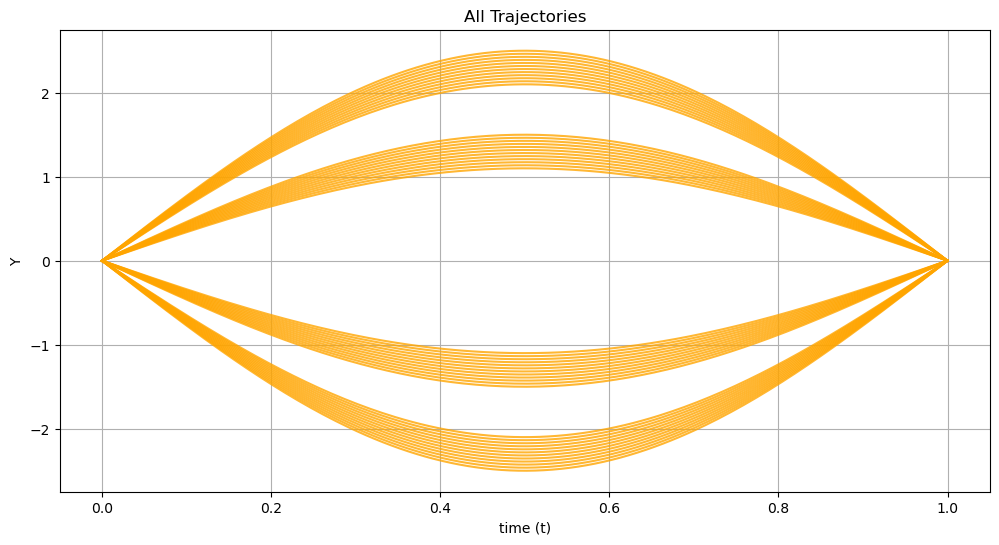

In [2]:
num_demo = 24
X1, X2, Y1, Y1_inverse, Y2, Y2_inverse = generate_demonstrations_multi_modality(num_demo=num_demo)

# Plot all trajectories
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

for i in range(Y1.shape[0]):
    plt.plot(X1[0], Y1[i], color='orange', alpha=0.8)
    plt.plot(X1[0], Y1_inverse[i], color='orange', alpha=0.8)
    plt.plot(X1[0], Y2[i], color='orange', alpha=0.8)
    plt.plot(X1[0], Y2_inverse[i], color='orange', alpha=0.8)

plt.title('All Trajectories')
plt.ylabel('Y')
plt.xlabel('time (t)')
plt.grid()
plt.show()

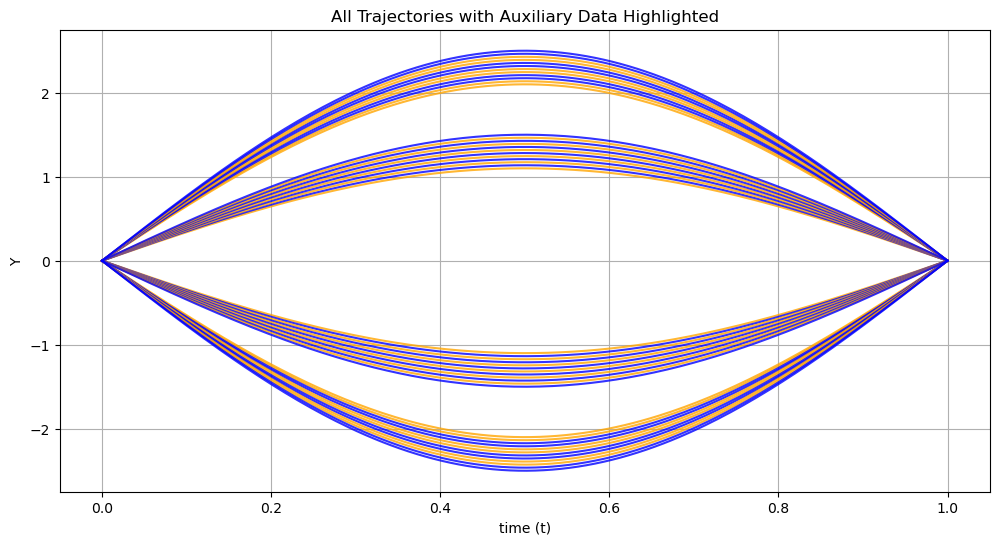

In [3]:
modality_1_aux = list(range(1, int(num_demo * 0.5), 2))
modality_2_aux = list(range(2, int(num_demo * 0.5), 4)) + list(range(3, int(num_demo * 0.5), 4)) # 0,1 4,5

plt.figure(figsize=(12, 6))
for i in range(Y1.shape[0]):
    plt.plot(X1[0], Y1[i], color='blue' if i in modality_1_aux else 'orange', alpha=0.8)
    plt.plot(X1[0], Y1_inverse[i], color='blue' if i in modality_1_aux else 'orange', alpha=0.8)
    plt.plot(X1[0], Y2[i], color='blue' if i in modality_2_aux else 'orange', alpha=0.8)
    plt.plot(X1[0], Y2_inverse[i], color='blue' if i in modality_2_aux else 'orange', alpha=0.8)

plt.title('All Trajectories with Auxiliary Data Highlighted')
plt.ylabel('Y')
plt.xlabel('time (t)')
plt.grid()
plt.show()

In [4]:
X1.shape

torch.Size([1, 200, 1])

In [5]:
Y1.shape

torch.Size([12, 200, 1])

In [6]:
import numpy as np
import torch
import os

context_modality_1 = torch.full((int(num_demo * 0.5), 1), 10)
context_modality_1[modality_1_aux, 0] = 30
print(context_modality_1)

print("-----")

context_modality_2 = torch.full((int(num_demo * 0.5), 1), 20)
context_modality_2[modality_2_aux, 0] = 40
print(context_modality_2)

tensor([[10],
        [30],
        [10],
        [30],
        [10],
        [30],
        [10],
        [30],
        [10],
        [30],
        [10],
        [30]])
-----
tensor([[20],
        [20],
        [40],
        [40],
        [20],
        [20],
        [40],
        [40],
        [20],
        [20],
        [40],
        [40]])


In [ ]:
# # Serdar's data
# Y1_Paired = torch.tensor(np.load("data/noisy_paired/forward_noisy_paired_data.npy"), dtype=torch.float32)
# Y1_Paired.shape

torch.Size([60, 200, 8])

In [7]:
# Save the pytorch trajectories in data folder
data_folder = "mock_data/perfect_paired/sin"
os.makedirs(data_folder, exist_ok=True)

modality_1_paired = list(set(range(int(num_demo * 0.5))) - set(modality_1_aux))
modality_2_paired = list(set(range(int(num_demo * 0.5))) - set(modality_2_aux))

torch.save(Y1[modality_1_paired], os.path.join(data_folder, "forward_modality_1_paired_data.pt"))
torch.save(Y1[modality_1_aux], os.path.join(data_folder, "forward_modality_1_aux_data.pt"))
torch.save(Y1_inverse[modality_1_paired], os.path.join(data_folder, "inverse_modality_1_paired_data.pt"))
torch.save(Y1_inverse[modality_1_aux], os.path.join(data_folder, "inverse_modality_1_aux_data.pt"))

torch.save(Y2[modality_2_paired], os.path.join(data_folder, "forward_modality_2_paired_data.pt"))
torch.save(Y2[modality_2_aux], os.path.join(data_folder, "forward_modality_2_aux_data.pt"))
torch.save(Y2_inverse[modality_2_paired], os.path.join(data_folder, "inverse_modality_2_paired_data.pt"))
torch.save(Y2_inverse[modality_2_aux], os.path.join(data_folder, "inverse_modality_2_aux_data.pt"))

torch.save(context_modality_1[modality_1_paired], os.path.join(data_folder, "context_modality_1_paired_data.pt"))
torch.save(context_modality_1[modality_1_aux], os.path.join(data_folder, "context_modality_1_aux_data.pt"))
torch.save(context_modality_2[modality_2_paired], os.path.join(data_folder, "context_modality_2_paired_data.pt"))
torch.save(context_modality_2[modality_2_aux], os.path.join(data_folder, "context_modality_2_aux_data.pt"))

In [8]:
a = torch.tensor(np.load("data/noisy_paired/context_noisy_paired_data.npy"), dtype=torch.float32)
a.shape

torch.Size([60, 50178])

In [9]:
a = torch.tensor(np.load("data/1/forward_extra_data.npy"), dtype=torch.float32)
a.shape

torch.Size([20, 200, 8])

In [17]:
a = torch.tensor(np.load("data/1/context_extra_data.npy"), dtype=torch.float32)
a.shape

torch.Size([20, 50177])

In [9]:
context_paired = torch.load("mock_data/perfect_paired/sin/context_modality_2_paired_data.pt")
print(context_paired.shape)
print(context_paired)

torch.Size([6, 1])
tensor([[20],
        [20],
        [20],
        [20],
        [20],
        [20]])


/var/folders/h9/l14n71z94cx86ft_s8b257wm0000gn/T/ipykernel_39930/151955143.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  context_paired = torch.load("mock_data/perfect

In [8]:
I = torch.eye(3)
I.shape

torch.Size([3, 3])

In [9]:
repeated_I = I.repeat(1,1,1)
repeated_I.shape

torch.Size([1, 3, 3])

In [11]:
print(I)
print()
print(repeated_I)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

tensor([[[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]]])


In [12]:
a = torch.tensor([[0, 30]])
a.shape

torch.Size([1, 2])

In [14]:
b = torch.arange(2 * 3 * 4).view(2, 3, 4)
b

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [15]:
torch.sum(b, (1, 2))

tensor([ 66, 210])

In [16]:
50178/2502

20.05515587529976

In [17]:
224 * 224

50176